Import python libraries required for the script

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
from scipy.stats import norm
from scipy.stats import linregress
from sklearn.preprocessing import StandardScaler
from numpy.polynomial import polynomial as npp
from scipy.stats import linregress

warnings.filterwarnings('ignore')

%matplotlib inline

Read the CSV files

In [2]:
df = pd.read_csv('VMI_Data_BP1_V02_AK6_mod01.csv')

# Sampling after cleanup
# df_sample = df.sample(10000)

Check the columns in the data

In [3]:
print(df.columns)

Index(['MACHINE_ID', 'DATE_TIME_STAMP', 'GT_BARCODE', 'TIRE_TYPE',
       'CUT_LENGTH', 'CONV_WAIT_TIME', 'LFT_SPLICE_LENGTH',
       'MID_SPLICE_LENGTH', 'RHT_SPLICE_LENGTH', 'SPLICE_OK', 'BP1_S8_L',
       'BP1_S7_L', 'BP1_S6_L', 'BP1_S5_L', 'BP1_S4_L', 'BP1_S3_L', 'BP1_S2_L',
       'BP1_S1_ML', 'BP1_S1_MR', 'BP1_S2_R', 'BP1_S3_R', 'BP1_S4_R',
       'BP1_S5_R', 'BP1_S6_R', 'BP1_S7_R', 'BP1_S8_R', 'BP1_PART',
       'BP1_BARCODE', 'PART_LENGTH', 'BP1_BUILD_DATE', 'BP1_MACHINEID',
       'LFT_SPLICE_DELTA', 'LFT_SPLICE_PREV', 'LFT_SPLICE_MA5',
       'LFT_SPLICE_MA10', 'LFT_SPLICE_MA20', 'LFT_SPLICE_MA50',
       'LFT_SPLICE_SLOPE5', 'LFT_SPLICE_SLOPE10', 'LFT_SPLICE_SLOPE20',
       'LFT_SPLICE_SLOPE50', 'MID_SPLICE_DELTA', 'MID_SPLICE_PREV',
       'MID_SPLICE_MA5', 'MID_SPLICE_MA10', 'MID_SPLICE_MA20',
       'MID_SPLICE_MA50', 'MID_SPLICE_SLOPE5', 'MID_SPLICE_SLOPE10',
       'MID_SPLICE_SLOPE20', 'MID_SPLICE_SLOPE50', 'RHT_SPLICE_DELTA',
       'RHT_SPLICE_PREV', 'RHT_SPLICE_MA5

In [4]:
# df = df.drop('SPLICE_LIMIT_LOW',1)
# df = df.drop('SPLICE_LIMIT_HIGH',1)
# df = df.drop('ID',1)

In [9]:
def polyfit(x):
    return npp.polyfit(list(range(len(x))), x, 1)[0]

def linearregress(x):
    slope, intercept, r_value, p_value, std_err = linregress(list(range(len(x))), x)
    return slope

In [11]:

df['BP1_S5_L_DELTA'] = df.BP1_S5_L - df.BP1_S5_L.shift(1)
df['BP1_S5_L_MA2'] = df.BP1_S5_L.rolling(window=2,min_periods=1).mean()
df['BP1_S5_L_SLOPE2'] = df.BP1_S5_L.rolling(window=2,min_periods=1).apply(linearregress)
df['BP1_S5_L_MA5'] = df.BP1_S5_L.rolling(window=5,min_periods=1).mean()
df['BP1_S5_L_SLOPE5'] = df.BP1_S5_L.rolling(window=5,min_periods=1).apply(linearregress)

df['BP1_S4_L_DELTA'] = df.BP1_S4_L - df.BP1_S4_L.shift(1)
df['BP1_S4_L_MA2'] = df.BP1_S4_L.rolling(window=2,min_periods=1).mean()
df['BP1_S4_L_SLOPE2'] = df.BP1_S4_L.rolling(window=2,min_periods=1).apply(linearregress)
df['BP1_S4_L_MA5'] = df.BP1_S4_L.rolling(window=5,min_periods=1).mean()
df['BP1_S4_L_SLOPE5'] = df.BP1_S4_L.rolling(window=5,min_periods=1).apply(linearregress)

df['BP1_S3_L_DELTA'] = df.BP1_S3_L - df.BP1_S3_L.shift(1)
df['BP1_S3_L_MA2'] = df.BP1_S3_L.rolling(window=2,min_periods=1).mean()
df['BP1_S3_L_SLOPE2'] = df.BP1_S3_L.rolling(window=2,min_periods=1).apply(linearregress)
df['BP1_S3_L_MA5'] = df.BP1_S3_L.rolling(window=5,min_periods=1).mean()
df['BP1_S3_L_SLOPE5'] = df.BP1_S3_L.rolling(window=5,min_periods=1).apply(linearregress)

df['BP1_S2_L_DELTA'] = df.BP1_S2_L - df.BP1_S2_L.shift(1)
df['BP1_S2_L_MA2'] = df.BP1_S2_L.rolling(window=2,min_periods=1).mean()
df['BP1_S2_L_SLOPE2'] = df.BP1_S2_L.rolling(window=2,min_periods=1).apply(linearregress)
df['BP1_S2_L_MA5'] = df.BP1_S2_L.rolling(window=5,min_periods=1).mean()
df['BP1_S2_L_SLOPE5'] = df.BP1_S2_L.rolling(window=5,min_periods=1).apply(linearregress)

df['BP1_S1_ML_DELTA'] = df.BP1_S1_ML - df.BP1_S1_ML.shift(1)
df['BP1_S1_ML_MA2'] = df.BP1_S1_ML.rolling(window=2,min_periods=1).mean()
df['BP1_S1_ML_SLOPE2'] = df.BP1_S1_ML.rolling(window=2,min_periods=1).apply(linearregress)
df['BP1_S1_ML_MA5'] = df.BP1_S1_ML.rolling(window=5,min_periods=1).mean()
df['BP1_S1_ML_SLOPE5'] = df.BP1_S1_ML.rolling(window=5,min_periods=1).apply(linearregress)

df['BP1_S1_MR_DELTA'] = df.BP1_S1_MR - df.BP1_S1_MR.shift(1)
df['BP1_S1_MR_MA2'] = df.BP1_S1_MR.rolling(window=2,min_periods=1).mean()
df['BP1_S1_MR_SLOPE2'] = df.BP1_S1_MR.rolling(window=2,min_periods=1).apply(linearregress)
df['BP1_S1_MR_MA5'] = df.BP1_S1_MR.rolling(window=5,min_periods=1).mean()
df['BP1_S1_MR_SLOPE5'] = df.BP1_S1_MR.rolling(window=5,min_periods=1).apply(linearregress)

df['BP1_S2_R_DELTA'] = df.BP1_S2_R - df.BP1_S2_R.shift(1)
df['BP1_S2_R_MA2'] = df.BP1_S2_R.rolling(window=2,min_periods=1).mean()
df['BP1_S2_R_SLOPE2'] = df.BP1_S2_R.rolling(window=2,min_periods=1).apply(linearregress)
df['BP1_S2_R_MA5'] = df.BP1_S2_R.rolling(window=5,min_periods=1).mean()
df['BP1_S2_R_SLOPE5'] = df.BP1_S2_R.rolling(window=5,min_periods=1).apply(linearregress)

df['BP1_S3_R_DELTA'] = df.BP1_S3_R - df.BP1_S3_R.shift(1)
df['BP1_S3_R_MA2'] = df.BP1_S3_R.rolling(window=2,min_periods=1).mean()
df['BP1_S3_R_SLOPE2'] = df.BP1_S3_R.rolling(window=2,min_periods=1).apply(linearregress)
df['BP1_S3_R_MA5'] = df.BP1_S3_R.rolling(window=5,min_periods=1).mean()
df['BP1_S3_R_SLOPE5'] = df.BP1_S3_R.rolling(window=5,min_periods=1).apply(linearregress)

df['BP1_S4_R_DELTA'] = df.BP1_S4_R - df.BP1_S4_R.shift(1)
df['BP1_S4_R_MA2'] = df.BP1_S4_R.rolling(window=2,min_periods=1).mean()
df['BP1_S4_R_SLOPE2'] = df.BP1_S4_R.rolling(window=2,min_periods=1).apply(linearregress)
df['BP1_S4_R_MA5'] = df.BP1_S4_R.rolling(window=5,min_periods=1).mean()
df['BP1_S4_R_SLOPE5'] = df.BP1_S4_R.rolling(window=5,min_periods=1).apply(linearregress)

df['BP1_S5_R_DELTA'] = df.BP1_S5_R - df.BP1_S5_R.shift(1)
df['BP1_S5_R_MA2'] = df.BP1_S5_R.rolling(window=2,min_periods=1).mean()
df['BP1_S5_R_SLOPE2'] = df.BP1_S5_R.rolling(window=2,min_periods=1).apply(linearregress)
df['BP1_S5_R_MA5'] = df.BP1_S5_R.rolling(window=5,min_periods=1).mean()
df['BP1_S5_R_SLOPE5'] = df.BP1_S5_R.rolling(window=5,min_periods=1).apply(linearregress)

Deleting unwanted columns to conserve memory used for the script

In [12]:
df = df.drop('MACHINE_ID',1)
# df = df.drop('DATE_TIME_STAMP',1)
df = df.drop('GT_BARCODE',1)
df = df.drop('TIRE_TYPE',1)
df = df.drop('BP1_PART',1)
# df = df.drop('BP1_BARCODE',1)
df = df.drop('BP1_BUILD_DATE',1)
df = df.drop('BP1_MACHINEID',1)

In [13]:
df.dtypes

DATE_TIME_STAMP       object
CUT_LENGTH           float64
CONV_WAIT_TIME       float64
LFT_SPLICE_LENGTH    float64
MID_SPLICE_LENGTH    float64
RHT_SPLICE_LENGTH    float64
SPLICE_OK              int64
BP1_S8_L             float64
BP1_S7_L             float64
BP1_S6_L             float64
BP1_S5_L             float64
BP1_S4_L             float64
BP1_S3_L             float64
BP1_S2_L             float64
BP1_S1_ML            float64
BP1_S1_MR            float64
BP1_S2_R             float64
BP1_S3_R             float64
BP1_S4_R             float64
BP1_S5_R             float64
BP1_S6_R             float64
BP1_S7_R             float64
BP1_S8_R             float64
BP1_BARCODE           object
PART_LENGTH            int64
LFT_SPLICE_DELTA     float64
LFT_SPLICE_PREV      float64
LFT_SPLICE_MA5       float64
LFT_SPLICE_MA10      float64
LFT_SPLICE_MA20      float64
                      ...   
BP1_S1_ML_DELTA      float64
BP1_S1_ML_MA2        float64
BP1_S1_ML_SLOPE2     float64
BP1_S1_ML_MA5 

In [14]:
df.describe()

,CUT_LENGTH,CONV_WAIT_TIME,LFT_SPLICE_LENGTH,MID_SPLICE_LENGTH,RHT_SPLICE_LENGTH,SPLICE_OK,BP1_S8_L,BP1_S7_L,BP1_S6_L,BP1_S5_L,...,BP1_S4_R_DELTA,BP1_S4_R_MA2,BP1_S4_R_SLOPE2,BP1_S4_R_MA5,BP1_S4_R_SLOPE5,BP1_S5_R_DELTA,BP1_S5_R_MA2,BP1_S5_R_SLOPE2,BP1_S5_R_MA5,BP1_S5_R_SLOPE5
count,118264.000000,118264.000000,118264.000000,118264.000000,118264.000000,118264.00000,118264.000000,118264.000000,118264.000000,118264.000000,...,1.182630e+05,118264.000000,1.182630e+05,118264.000000,1.182630e+05,1.182630e+05,118264.000000,1.182630e+05,118264.000000,1.182630e+05
mean,1707.480208,79.453379,6.773963,7.218014,7.005018,0.81543,0.000396,0.013105,0.012412,0.066963,...,6.764584e-07,0.052533,6.764584e-07,0.052532,6.764584e-07,-9.387746e-22,0.052831,1.173468e-21,0.052831,-2.919002e-21
std,7.292843,198.349929,2.273400,1.922907,2.331694,0.38795,0.002635,0.043858,0.042574,0.043583,...,8.222412e-03,0.040959,8.222412e-03,0.040589,3.718467e-03,8.603337e-03,0.041733,8.603337e-03,0.041309,3.966944e-03
min,0.000000,0.000000,-47.200000,-56.381480,-44.709190,0.00000,0.000000,0.000000,0.000000,0.000000,...,-8.100000e-01,0.000000,-8.100000e-01,0.000000,-2.030000e-01,-9.000000e-01,0.000000,-9.000000e-01,0.000000,-2.700000e-01
25%,1706.443000,28.620000,5.535539,6.239172,5.735280,1.00000,0.000000,0.000000,0.000000,0.040000,...,0.000000e+00,0.010000,0.000000e+00,0.010000,0.000000e+00,0.000000e+00,0.010000,0.000000e+00,0.010000,0.000000e+00
50%,1707.684000,34.272000,6.866215,7.265045,7.085455,1.00000,0.000000,0.000000,0.000000,0.070000,...,0.000000e+00,0.050000,0.000000e+00,0.050000,0.000000e+00,0.000000e+00,0.050000,0.000000e+00,0.050000,0.000000e+00
75%,1708.775000,64.398250,8.122182,8.331148,8.429698,1.00000,0.000000,0.000000,0.000000,0.090000,...,0.000000e+00,0.080000,0.000000e+00,0.080000,0.000000e+00,0.000000e+00,0.080000,0.000000e+00,0.080000,0.000000e+00
max,1719.298000,10034.240000,29.686790,26.034800,24.689260,1.00000,0.138328,0.350000,0.350000,0.500000,...,7.600000e-01,0.760000,7.600000e-01,0.760000,1.980000e-01,8.700000e-01,1.000000,8.700000e-01,0.760000,2.610000e-01


Check missing data

In [15]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data.head(20))
df = df.dropna()


                  Total   Percent
BP1_S5_R_SLOPE5       1  0.000846
BP1_S3_L_SLOPE5       1  0.000846
BP1_S1_MR_SLOPE2      1  0.000846
BP1_S1_MR_DELTA       1  0.000846
BP1_S1_ML_SLOPE5      1  0.000846
BP1_S1_ML_SLOPE2      1  0.000846
BP1_S1_ML_DELTA       1  0.000846
BP1_S2_L_SLOPE5       1  0.000846
BP1_S2_L_SLOPE2       1  0.000846
BP1_S3_L_SLOPE2       1  0.000846
BP1_S2_R_DELTA        1  0.000846
BP1_S3_L_DELTA        1  0.000846
BP1_S4_L_SLOPE5       1  0.000846
BP1_S4_L_SLOPE2       1  0.000846
BP1_S4_L_DELTA        1  0.000846
BP1_S5_L_SLOPE5       1  0.000846
BP1_S5_L_SLOPE2       1  0.000846
BP1_S5_L_DELTA        1  0.000846
BP1_S1_MR_SLOPE5      1  0.000846
BP1_S2_L_DELTA        1  0.000846


In [16]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data.head(20))


                    Total  Percent
BP1_S5_R_SLOPE5         0      0.0
MID_SPLICE_MA20         0      0.0
LFT_SPLICE_MA10         0      0.0
LFT_SPLICE_MA20         0      0.0
LFT_SPLICE_MA50         0      0.0
LFT_SPLICE_SLOPE5       0      0.0
LFT_SPLICE_SLOPE10      0      0.0
LFT_SPLICE_SLOPE20      0      0.0
LFT_SPLICE_SLOPE50      0      0.0
MID_SPLICE_DELTA        0      0.0
MID_SPLICE_PREV         0      0.0
MID_SPLICE_MA5          0      0.0
MID_SPLICE_MA10         0      0.0
MID_SPLICE_MA50         0      0.0
RHT_SPLICE_SLOPE20      0      0.0
MID_SPLICE_SLOPE5       0      0.0
MID_SPLICE_SLOPE10      0      0.0
MID_SPLICE_SLOPE20      0      0.0
MID_SPLICE_SLOPE50      0      0.0
RHT_SPLICE_DELTA        0      0.0


In [ ]:
# # deleting points
# df.sort_values(by = 'CUT_LENGTH', ascending = False)[:2]
# #df = df.drop(df[df['CUT_LENGTH'] > 1720].index)
# df = df.drop(df[df['CUT_LENGTH'] < 1680].index)

# df.sort_index(inplace=True)

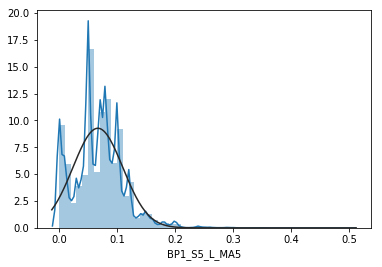

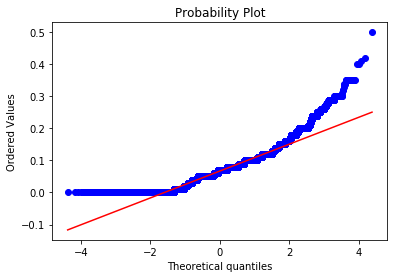

In [21]:
#histogram and normal probability plot
col = 'BP1_S5_L_MA5'
sns.distplot(df[col], fit=norm);
fig = plt.figure()
res = stats.probplot(df[col], plot=plt)

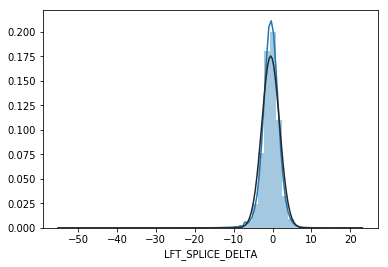

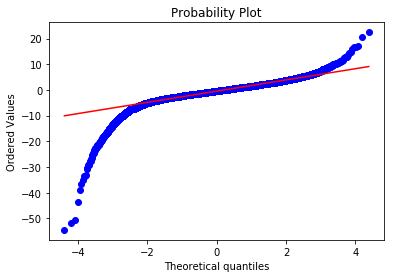

In [22]:
#histogram and normal probability plot
sns.distplot(df['LFT_SPLICE_DELTA'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['LFT_SPLICE_DELTA'], plot=plt)

In [23]:
# # deleting points
# df.sort_values(by = 'MID_SPLICE_DELTA', ascending = False)[:2]
# df = df.drop(df[df['MID_SPLICE_DELTA'] < -20].index)

# df.sort_index(inplace=True)

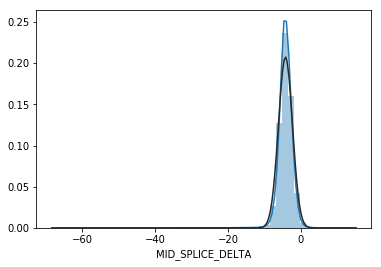

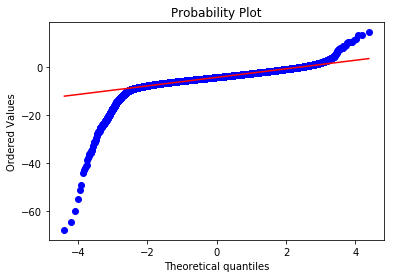

In [24]:
#histogram and normal probability plot
sns.distplot(df['MID_SPLICE_DELTA'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['MID_SPLICE_DELTA'], plot=plt)

In [25]:
# # deleting points
# df.sort_values(by = 'RHT_SPLICE_DELTA', ascending = False)[:2]
# df = df.drop(df[df['RHT_SPLICE_DELTA'] < -20].index)

# df.sort_index(inplace=True)

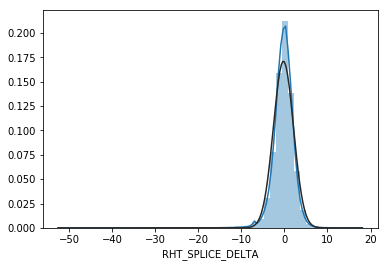

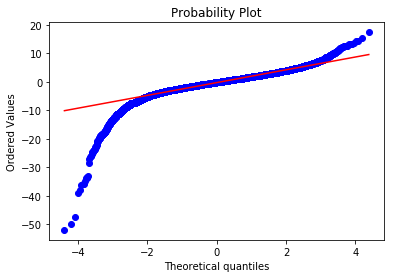

In [26]:
#histogram and normal probability plot
sns.distplot(df['RHT_SPLICE_DELTA'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['RHT_SPLICE_DELTA'], plot=plt)

In [27]:
# # # deleting points
# # df.sort_values(by = 'CONV_WAIT_TIME', ascending = False)[:2]
# # df = df.drop(df[df['CONV_WAIT_TIME'] > 1000].index)

# # df.sort_index(inplace=True)

# df['CONV_WAIT_TIME'] = df['CONV_WAIT_TIME'] + 1

# # applying log transformation
# df['CONV_WAIT_TIME'] = np.log(df['CONV_WAIT_TIME'])

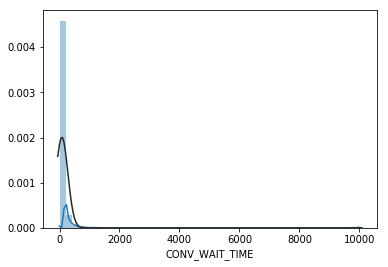

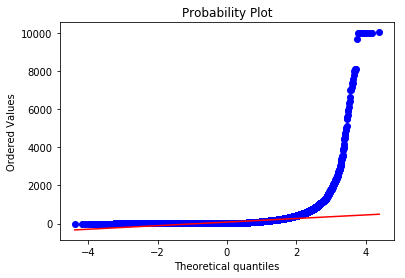

In [28]:
#histogram and normal probability plot
sns.distplot(df['CONV_WAIT_TIME'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['CONV_WAIT_TIME'], plot=plt)

In [29]:
df_sample = df.sample(10000)

In [30]:
def outliers_z_score(ys):
    threshold = 3

    mean_y = np.mean(ys)
    stdev_y = np.std(ys)
    z_scores = [(y - mean_y) / stdev_y for y in ys]
    return np.where(np.abs(z_scores) > threshold)

In [31]:
def outliers_modified_z_score(ys):
    threshold = 3.5

    median_y = np.median(ys)
    median_absolute_deviation_y = np.median([np.abs(y - median_y) for y in ys])
    modified_z_scores = [0.6745 * (y - median_y) / median_absolute_deviation_y
                         for y in ys]
    return np.where(np.abs(modified_z_scores) > threshold)

In [32]:
def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return np.where((ys > upper_bound) | (ys < lower_bound))

In [33]:
# todo
a = outliers_iqr(df['CUT_LENGTH'])
a


(array([    25,    343,   1532, ..., 117704, 118214, 118233], dtype=int64),)

In [34]:
def myZscore(x):
    if not np.issubdtype(x.dtype, np.number):
        return 5    
    print(x.dtype)
    return np.abs(x - x.mean()) / x.std()


In [35]:
# numeric_cols = df.select_dtypes(include=[np.number]).columns
# print(numeric_cols)
# df_temp = df[np.abs(stats.zscore(df) < 4).all(axis=1)]
# df[df.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]
# df_temp = df[df[numeric_cols].apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]
# print(df_temp.shape)

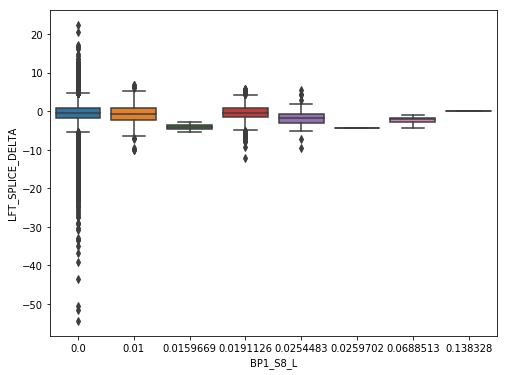

In [36]:
#box plot
var = 'BP1_S8_L'
data = pd.concat([df['LFT_SPLICE_DELTA'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="LFT_SPLICE_DELTA", data=data)
# fig.axis(ymin=10, ymax=25);

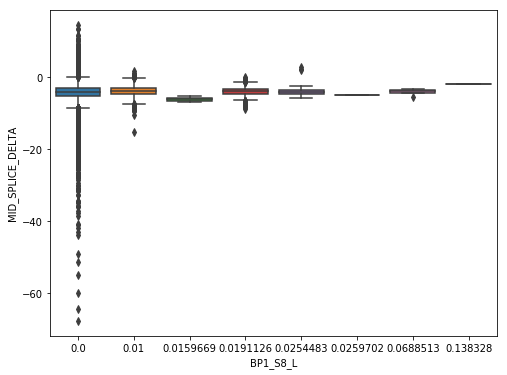

In [37]:
#box plot
var = 'BP1_S8_L'
data = pd.concat([df['MID_SPLICE_DELTA'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="MID_SPLICE_DELTA", data=data)
# fig.axis(ymin=10, ymax=25);

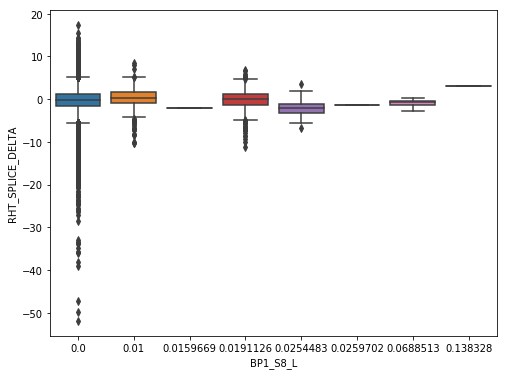

In [38]:
#box plot
var = 'BP1_S8_L'
data = pd.concat([df['RHT_SPLICE_DELTA'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="RHT_SPLICE_DELTA", data=data)
# fig.axis(ymin=10, ymax=25);

In [39]:
#skewness and kurtosis
print("Skewness: %f" % df['CUT_LENGTH'].skew())
print("Kurtosis: %f" % df['CUT_LENGTH'].kurt())

Skewness: -217.117737
Kurtosis: 50817.741935


In [40]:
#skewness and kurtosis
print("Skewness: %f" % df['CONV_WAIT_TIME'].skew())
print("Kurtosis: %f" % df['CONV_WAIT_TIME'].kurt())

Skewness: 23.649399
Kurtosis: 914.163607


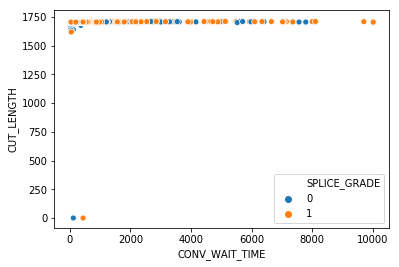

In [41]:
#scatter plot
ax = sns.scatterplot(x="CONV_WAIT_TIME", y="CUT_LENGTH", hue="SPLICE_GRADE", data=df)

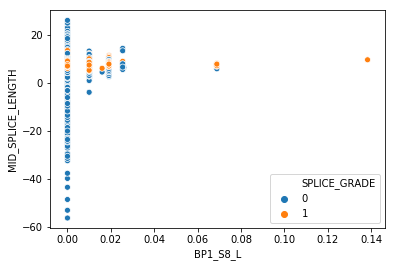

In [42]:
#scatter plot
ax = sns.scatterplot(x="BP1_S8_L", y="MID_SPLICE_LENGTH", hue="SPLICE_GRADE", data=df)

In [ ]:
#correlation map
corrmat = df.corr()
f,ax = plt.subplots(figsize=(25, 25))
sns.set(font_scale=0.9)
sns.heatmap(corrmat, annot=True, linewidths=.2, fmt= '.1f',ax=ax)
plt.show()


In [ ]:
# correlation matrix
k = 15 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SPLICE_OK')['SPLICE_OK'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=0.9)
f, ax = plt.subplots(figsize=(20, 20))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [43]:
data = []
for f in df.columns:
    # Defining the role
    if f == 'SPLICE_OK':
        role = 'target'
    elif f in ['ID','MACHINE_ID','DATE_TIME_STAMP','GT_BARCODE','TIRE_TYPE','SPLICE_LIMIT_LOW',
               'SPLICE_LIMIT_HIGH','BP1_PART','BP1_BARCODE', 'BP1_BUILD_DATE','BP1_MACHINEID']:
        role = 'id'
    else:
        role = 'input'
         
    # Defining the level
    if f == 'SPLICE_OK':
        opType = 'binary'
    elif f == 'DATE_TIME_STAMP':
        opType = 'timestamp'
    elif df[f].dtype == object:
        opType = 'nominal'
    elif df[f].dtype == bool:
        opType = 'binary'
    elif df[f].dtype == int:
        opType = 'interval'
    elif df[f].dtype == float:
        opType = 'interval'
    else :
        opType = 'interval'
        
    # Initialize keep to True for all variables except for id
    keep = True
    if f in ['ID','MACHINE_ID','DATE_TIME_STAMP','GT_BARCODE','TIRE_TYPE','SPLICE_LIMIT_LOW',
             'SPLICE_LIMIT_HIGH','BP1_PART','BP1_BARCODE', 'BP1_BUILD_DATE','BP1_MACHINEID']:
        keep = False
    
    # Defining the data type 
    dtype = df[f].dtype
    
    # Creating a Dict that contains all the metadata for the variable
    f_dict = {
        'varname': f,
        'role': role,
        'level': opType,
        'keep': keep,
        'dtype': dtype
    }
    data.append(f_dict)
    
meta = pd.DataFrame(data, columns=['varname', 'role', 'level', 'keep', 'dtype'])
meta.set_index('varname', inplace=True)

In [44]:
meta

,role,level,keep,dtype
varname,,,,
DATE_TIME_STAMP,id,timestamp,False,object
CUT_LENGTH,input,interval,True,float64
CONV_WAIT_TIME,input,interval,True,float64
LFT_SPLICE_LENGTH,input,interval,True,float64
MID_SPLICE_LENGTH,input,interval,True,float64
RHT_SPLICE_LENGTH,input,interval,True,float64
SPLICE_OK,target,binary,True,int64
BP1_S8_L,input,interval,True,float64
BP1_S7_L,input,interval,True,float64


In [45]:
meta[(meta.level == 'interval') & (meta.keep)].index

Index(['CUT_LENGTH', 'CONV_WAIT_TIME', 'LFT_SPLICE_LENGTH',
       'MID_SPLICE_LENGTH', 'RHT_SPLICE_LENGTH', 'BP1_S8_L', 'BP1_S7_L',
       'BP1_S6_L', 'BP1_S5_L', 'BP1_S4_L',
       ...
       'BP1_S4_R_DELTA', 'BP1_S4_R_MA2', 'BP1_S4_R_SLOPE2', 'BP1_S4_R_MA5',
       'BP1_S4_R_SLOPE5', 'BP1_S5_R_DELTA', 'BP1_S5_R_MA2', 'BP1_S5_R_SLOPE2',
       'BP1_S5_R_MA5', 'BP1_S5_R_SLOPE5'],
      dtype='object', name='varname', length=106)

In [46]:
pd.DataFrame({'count' : meta.groupby(['role', 'level'])['role'].size()}).reset_index()

,role,level,count
0,id,nominal,1
1,id,timestamp,1
2,input,interval,106
3,target,binary,1


In [47]:
v = meta[(meta.level == 'interval') & (meta.keep)].index
df[v].describe()

,CUT_LENGTH,CONV_WAIT_TIME,LFT_SPLICE_LENGTH,MID_SPLICE_LENGTH,RHT_SPLICE_LENGTH,BP1_S8_L,BP1_S7_L,BP1_S6_L,BP1_S5_L,BP1_S4_L,...,BP1_S4_R_DELTA,BP1_S4_R_MA2,BP1_S4_R_SLOPE2,BP1_S4_R_MA5,BP1_S4_R_SLOPE5,BP1_S5_R_DELTA,BP1_S5_R_MA2,BP1_S5_R_SLOPE2,BP1_S5_R_MA5,BP1_S5_R_SLOPE5
count,118263.000000,118263.000000,118263.000000,118263.000000,118263.000000,118263.000000,118263.000000,118263.000000,118263.000000,118263.000000,...,1.182630e+05,118263.000000,1.182630e+05,118263.000000,1.182630e+05,1.182630e+05,118263.000000,1.182630e+05,118263.000000,1.182630e+05
mean,1707.480187,79.453603,6.774039,7.218073,7.005088,0.000396,0.013105,0.012412,0.066963,0.064393,...,6.764584e-07,0.052533,6.764584e-07,0.052532,6.764584e-07,-9.387746e-22,0.052831,1.173468e-21,0.052831,-2.919002e-21
std,7.292870,198.350752,2.273260,1.922807,2.331577,0.002635,0.043859,0.042574,0.043583,0.041482,...,8.222412e-03,0.040959,8.222412e-03,0.040590,3.718467e-03,8.603337e-03,0.041733,8.603337e-03,0.041308,3.966944e-03
min,0.000000,0.000000,-47.200000,-56.381480,-44.709190,0.000000,0.000000,0.000000,0.000000,0.000000,...,-8.100000e-01,0.000000,-8.100000e-01,0.000000,-2.030000e-01,-9.000000e-01,0.000000,-9.000000e-01,0.000000,-2.700000e-01
25%,1706.443000,28.620000,5.535647,6.239172,5.735280,0.000000,0.000000,0.000000,0.040000,0.040000,...,0.000000e+00,0.010000,0.000000e+00,0.010000,0.000000e+00,0.000000e+00,0.010000,0.000000e+00,0.010000,0.000000e+00
50%,1707.684000,34.272000,6.866215,7.265045,7.085455,0.000000,0.000000,0.000000,0.070000,0.060000,...,0.000000e+00,0.050000,0.000000e+00,0.050000,0.000000e+00,0.000000e+00,0.050000,0.000000e+00,0.050000,0.000000e+00
75%,1708.775000,64.398500,8.122182,8.331148,8.429698,0.000000,0.000000,0.000000,0.090000,0.090000,...,0.000000e+00,0.080000,0.000000e+00,0.080000,0.000000e+00,0.000000e+00,0.080000,0.000000e+00,0.080000,0.000000e+00
max,1719.298000,10034.240000,29.686790,26.034800,24.689260,0.138328,0.350000,0.350000,0.500000,0.800000,...,7.600000e-01,0.760000,7.600000e-01,0.760000,1.980000e-01,8.700000e-01,1.000000,8.700000e-01,0.760000,2.610000e-01


In [48]:
v = meta[(meta.level == 'binary') & (meta.keep)].index
df[v].describe()

,SPLICE_OK
count,118263.000000
mean,0.815437
std,0.387944
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


In [49]:
# #standardizing data
# cut_length_scaled = StandardScaler().fit_transform(df['CUT_LENGTH'][:,np.newaxis]);
# low_range = cut_length_scaled[cut_length_scaled[:,0].argsort()][:10]
# high_range= cut_length_scaled[cut_length_scaled[:,0].argsort()][-10:]
# print('outer range (low) of the distribution:')
# print(low_range)
# print('\nouter range (high) of the distribution:')
# print(high_range)

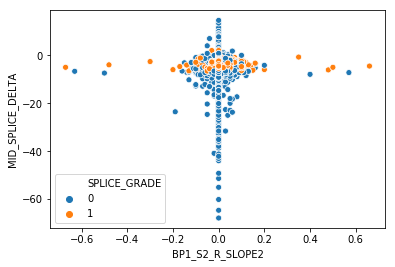

In [54]:
#bivariate analysis
ax = sns.scatterplot(x="BP1_S2_R_SLOPE2", y="MID_SPLICE_DELTA", hue="SPLICE_GRADE", data=df)


In [55]:
# # deleting points
# df.sort_values(by = 'CUT_LENGTH', ascending = False)[:2]
# #df = df.drop(df[df['CUT_LENGTH'] > 1720].index)
# #df = df.drop(df[df['CUT_LENGTH'] < 1690].index)

# df.sort_index(inplace=True)

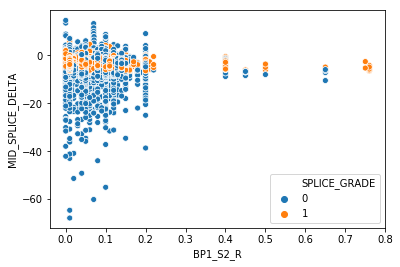

In [56]:
#bivariate analysis
ax = sns.scatterplot(x="BP1_S2_R", y="MID_SPLICE_DELTA", hue="SPLICE_GRADE", data=df)

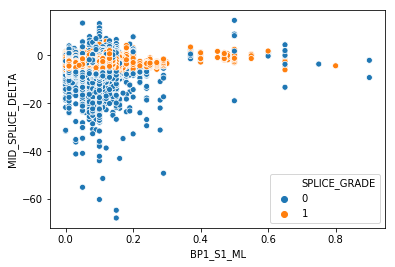

In [57]:
#bivariate analysis saleprice/grlivarea
ax = sns.scatterplot(x="BP1_S1_ML", y="MID_SPLICE_DELTA", hue="SPLICE_GRADE", data=df)

In [58]:
#applying log transformation
# df['CUT_LENGTH_LOG'] = np.log(df['CUT_LENGTH'])

In [59]:
#transformed histogram and normal probability plot
# sns.distplot(df['CUT_LENGTH_LOG'], fit=norm);
# fig = plt.figure()
# res = stats.probplot(df['CUT_LENGTH_LOG'], plot=plt)

In [60]:
# df = df.drop('CUT_LENGTH_LOG',1)

In [65]:
#from bokeh.charts import HeatMap, bins, output_file, show, vplot
#hm1 = HeatMap(autompg, x=bins('mpg'), y=bins('displ'))

pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', None) 
df.columns

Index(['DATE_TIME_STAMP', 'CUT_LENGTH', 'CONV_WAIT_TIME', 'LFT_SPLICE_LENGTH',
       'MID_SPLICE_LENGTH', 'RHT_SPLICE_LENGTH', 'SPLICE_OK', 'BP1_S8_L',
       'BP1_S7_L', 'BP1_S6_L',
       ...
       'BP1_S4_R_DELTA', 'BP1_S4_R_MA2', 'BP1_S4_R_SLOPE2', 'BP1_S4_R_MA5',
       'BP1_S4_R_SLOPE5', 'BP1_S5_R_DELTA', 'BP1_S5_R_MA2', 'BP1_S5_R_SLOPE2',
       'BP1_S5_R_MA5', 'BP1_S5_R_SLOPE5'],
      dtype='object', length=109)

In [62]:
# using df_sample dataset (10000 rows only)

# cols = ['CUT_LENGTH', 'CONV_WAIT_TIME', 'LFT_SPLICE_LENGTH',
#        'MID_SPLICE_LENGTH', 'RHT_SPLICE_LENGTH', #'SPLICE_OK', 
#         'PA_S8_L', 'PA_S7_L', 'PA_S6_L',
#        'PA_S5_L', 'PA_S4_L', 'PA_S3_L', 'PA_S2_L', 'PA_S1_ML', 'PA_S1_MR',
#        'PA_S2_R', 'PA_S3_R', 'PA_S4_R', 'PA_S5_R', 'PA_S6_R', 'PA_S7_R',
#        'PA_S8_R', 'LFT_SPLICE_DELTA', 'LFT_SPLICE_PREV', 'LFT_SPLICE_MA5',
#        'LFT_SPLICE_MA10', 'LFT_SPLICE_MA20', 'LFT_SPLICE_MA50',
#        'LFT_SPLICE_SLOPE5', 'LFT_SPLICE_SLOPE10', 'LFT_SPLICE_SLOPE20',
#        'LFT_SPLICE_SLOPE50', 'MID_SPLICE_DELTA', 'MID_SPLICE_PREV',
#        'MID_SPLICE_MA5', 'MID_SPLICE_MA10', 'MID_SPLICE_MA20',
#        'MID_SPLICE_MA50', 'MID_SPLICE_SLOPE5', 'MID_SPLICE_SLOPE10',
#        'MID_SPLICE_SLOPE20', 'MID_SPLICE_SLOPE50', 'RHT_SPLICE_DELTA',
#        'RHT_SPLICE_PREV', 'RHT_SPLICE_MA5', 'RHT_SPLICE_MA10',
#        'RHT_SPLICE_MA20', 'RHT_SPLICE_MA50', 'RHT_SPLICE_SLOPE5',
#        'RHT_SPLICE_SLOPE10', 'RHT_SPLICE_SLOPE20', 'RHT_SPLICE_SLOPE50']
#sns.pairplot(df_pa[cols])

# ycols = ['LFT_SPLICE_DELTA', 'MID_SPLICE_DELTA','RHT_SPLICE_DELTA', 'SPLICE_OK']
# xcols = ['CUT_LENGTH', 'CONV_WAIT_TIME', #'LFT_SPLICE_LENGTH', 'MID_SPLICE_LENGTH', 'RHT_SPLICE_LENGTH','PA_S8_L', 'PA_S7_L', 'PA_S6_L', 'PA_S5_L', 'PA_S4_L', 
#          'PA_S3_L', 'PA_S2_L', 'PA_S1_ML', 'PA_S1_MR','PA_S2_R', 'PA_S3_R', 'PA_S4_R', 'PA_S5_R', 'PA_S6_R', 'PA_S7_R', 'PA_S8_R', 
#          'LFT_SPLICE_PREV', 'LFT_SPLICE_MA5', 'LFT_SPLICE_MA10', # 'LFT_SPLICE_MA20', 'LFT_SPLICE_MA50',
#          'LFT_SPLICE_SLOPE5', 'LFT_SPLICE_SLOPE10', # 'LFT_SPLICE_SLOPE20', 'LFT_SPLICE_SLOPE50', 
#          'MID_SPLICE_PREV', 'MID_SPLICE_MA5', 'MID_SPLICE_MA10', # 'MID_SPLICE_MA20', 'MID_SPLICE_MA50', 
#          'MID_SPLICE_SLOPE5', 'MID_SPLICE_SLOPE10', # 'MID_SPLICE_SLOPE20', 'MID_SPLICE_SLOPE50', 
#          'RHT_SPLICE_PREV', 'RHT_SPLICE_MA5', 'RHT_SPLICE_MA10',# 'RHT_SPLICE_MA20', 'RHT_SPLICE_MA50', 
#          'RHT_SPLICE_SLOPE5', 'RHT_SPLICE_SLOPE10', # 'RHT_SPLICE_SLOPE20', 'RHT_SPLICE_SLOPE50'
#         ]

# ycols = ['LFT_SPLICE_DELTA', 'MID_SPLICE_DELTA','RHT_SPLICE_DELTA', 'SPLICE_OK']
# xcols = ['CUT_LENGTH', 'CONV_WAIT_TIME', 'LFT_SPLICE_LENGTH', 'MID_SPLICE_LENGTH', 'RHT_SPLICE_LENGTH', 
#          'SPLICE_OK', 'BP1_S8_L', 'BP1_S7_L', 'BP1_S6_L', 'BP1_S5_L', 'BP1_S4_L', 'BP1_S3_L', 'BP1_S2_L',
#          'BP1_S1_ML', 'BP1_S1_MR', 'BP1_S2_R', 'BP1_S3_R', 'BP1_S4_R', 'BP1_S5_R', 'BP1_S6_R', 'BP1_S7_R', 
#          'BP1_S8_R', 'BP1_LENGTH', 'LFT_SPLICE_DELTA', 'LFT_SPLICE_PREV', 'LFT_SPLICE_MA5', 'LFT_SPLICE_MA10', 
#          'LFT_SPLICE_MA20', 'LFT_SPLICE_MA50', 'LFT_SPLICE_SLOPE5', 'LFT_SPLICE_SLOPE10', 'LFT_SPLICE_SLOPE20',
#          'LFT_SPLICE_SLOPE50', 'MID_SPLICE_DELTA', 'MID_SPLICE_PREV', 'MID_SPLICE_MA5', 'MID_SPLICE_MA10', 
#          'MID_SPLICE_MA20', 'MID_SPLICE_MA50', 'MID_SPLICE_SLOPE5', 'MID_SPLICE_SLOPE10', 'MID_SPLICE_SLOPE20',
#          'MID_SPLICE_SLOPE50', 'RHT_SPLICE_DELTA', 'RHT_SPLICE_PREV', 'RHT_SPLICE_MA5', 'RHT_SPLICE_MA10',
#          'RHT_SPLICE_MA20', 'RHT_SPLICE_MA50', 'RHT_SPLICE_SLOPE5', 'RHT_SPLICE_SLOPE10', 'RHT_SPLICE_SLOPE20',
#          'RHT_SPLICE_SLOPE50', 'LFT_SPLICE_GRADE', 'MID_SPLICE_GRADE', 'RHT_SPLICE_GRADE', 'SPLICE_GRADE']



# sns.set(style="ticks", color_codes=True)

# g = sns.pairplot(df_sample, x_vars=xcols, y_vars=ycols, hue='SPLICE_GRADE', hue_order=['OK','Bad','Good'],
#                  plot_kws = {'alpha': 0.6, 's': 30, 'edgecolor': 'w'})

# xlabels,ylabels = [],[]

# for ax in g.axes[-1,:]:
#     xlabel = ax.xaxis.get_label_text()
#     xlabels.append(xlabel)
# for ax in g.axes[:,0]:
#     ylabel = ax.yaxis.get_label_text()
#     ylabels.append(ylabel)

# for i in range(len(xlabels)):
#     for j in range(len(ylabels)):
#         g.axes[j,i].xaxis.set_label_text(xlabels[i])
#         g.axes[j,i].yaxis.set_label_text(ylabels[j])

# plt.show()

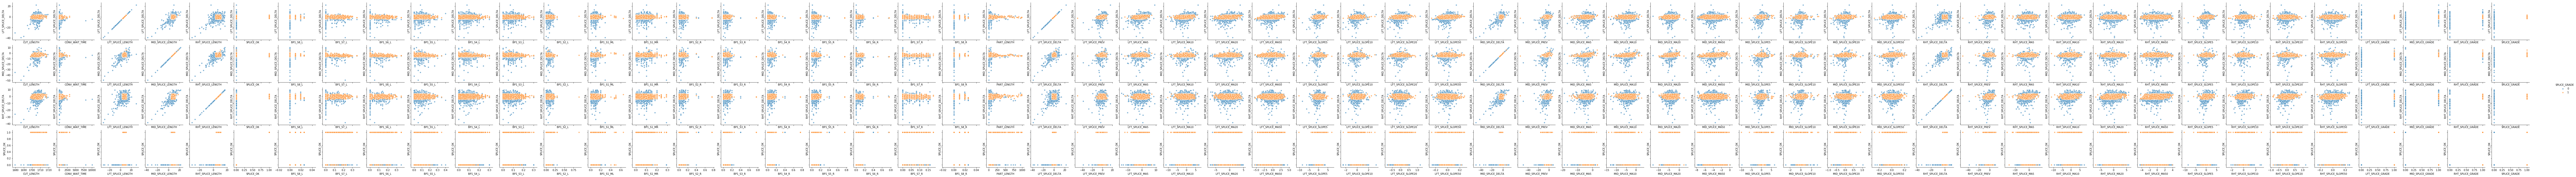

In [63]:
# using df_sample dataset (10000 rows only)

ycols = ['LFT_SPLICE_DELTA', 'MID_SPLICE_DELTA','RHT_SPLICE_DELTA', 'SPLICE_OK']
xcols = ['CUT_LENGTH', 'CONV_WAIT_TIME', 'LFT_SPLICE_LENGTH', 'MID_SPLICE_LENGTH', 'RHT_SPLICE_LENGTH', 
         'SPLICE_OK', 'BP1_S8_L', 'BP1_S7_L', 'BP1_S6_L', 'BP1_S5_L', 'BP1_S4_L', 'BP1_S3_L', 'BP1_S2_L',
         'BP1_S1_ML', 'BP1_S1_MR', 'BP1_S2_R', 'BP1_S3_R', 'BP1_S4_R', 'BP1_S5_R', 'BP1_S6_R', 'BP1_S7_R', 
         'BP1_S8_R', 'PART_LENGTH', 'LFT_SPLICE_DELTA', 'LFT_SPLICE_PREV', 'LFT_SPLICE_MA5', 'LFT_SPLICE_MA10', 
         'LFT_SPLICE_MA20', 'LFT_SPLICE_MA50', 'LFT_SPLICE_SLOPE5', 'LFT_SPLICE_SLOPE10', 'LFT_SPLICE_SLOPE20',
         'LFT_SPLICE_SLOPE50', 'MID_SPLICE_DELTA', 'MID_SPLICE_PREV', 'MID_SPLICE_MA5', 'MID_SPLICE_MA10', 
         'MID_SPLICE_MA20', 'MID_SPLICE_MA50', 'MID_SPLICE_SLOPE5', 'MID_SPLICE_SLOPE10', 'MID_SPLICE_SLOPE20',
         'MID_SPLICE_SLOPE50', 'RHT_SPLICE_DELTA', 'RHT_SPLICE_PREV', 'RHT_SPLICE_MA5', 'RHT_SPLICE_MA10',
         'RHT_SPLICE_MA20', 'RHT_SPLICE_MA50', 'RHT_SPLICE_SLOPE5', 'RHT_SPLICE_SLOPE10', 'RHT_SPLICE_SLOPE20',
         'RHT_SPLICE_SLOPE50', 'LFT_SPLICE_GRADE', 'MID_SPLICE_GRADE', 'RHT_SPLICE_GRADE', 'SPLICE_GRADE']

g = sns.PairGrid(df_sample, x_vars=xcols, y_vars=ycols, hue='SPLICE_GRADE', hue_order=[0,1]) 
# palette="Oranges" or "Blues"
# hue_kws={"marker": ["v", "o", "^"]
g = g.map(plt.scatter, s=30, alpha= 0.6, edgecolor='w')
# plot_kws = {'alpha': 0.6, 's': 40, 'edgecolor': 'w'}

xlabels,ylabels = [],[]

# ax.legend()
g = g.add_legend()

# ax.grid(True)

for ax in g.axes[-1,:]:
    xlabel = ax.xaxis.get_label_text()
    xlabels.append(xlabel)
for ax in g.axes[:,0]:
    ylabel = ax.yaxis.get_label_text()
    ylabels.append(ylabel)

for i in range(len(xlabels)):
    for j in range(len(ylabels)):
        g.axes[j,i].xaxis.set_label_text(xlabels[i])
        g.axes[j,i].yaxis.set_label_text(ylabels[j])

plt.show()

In [ ]:
# %matplotlib inline  
# %matplotlib notebook

# # Splice Delta x Cut Length x Wait Time, or Splice Delta x Moving Average5 x Moving Average10
# fig = plt.figure(figsize=(15, 15))
# ax = fig.add_subplot(111, projection='3d')

# xs = df['LFT_SPLICE_DELTA']
# ys = df['CUT_LENGTH']
# zs = df['CONV_WAIT_TIME']
# ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w')

# ax.set_xlabel('Left Splice Delta')
# ax.set_ylabel('Cut Length')
# ax.set_zlabel('Conveyer Wait Time')

# ax.mouse_init()

# plt.show()

In [ ]:
# def core(df, α=.05):
#     mask = (df > df.quantile(α)).all(1) & (df < df.quantile(1 - α)).all(1)
#     return df[mask]

In [ ]:
# cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)

# (df_sample.select_dtypes(include=[np.number])
#    .pipe(core)
#    .pipe(sns.PairGrid)
#    .map_upper(plt.scatter, marker='.', alpha=.25)
#    .map_diag(sns.kdeplot)
#    .map_lower(plt.hexbin, cmap=cmap, gridsize=20)
# );

In [66]:
df.to_csv('VMI_Data_BP1_V02_AK6_mod02_02.csv', header=True, index=False)

In [ ]:
# https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166

In [ ]:
# https://stackoverflow.com/questions/42592493/displaying-pair-plot-in-pandas-data-frame/42593334

In [ ]:
# https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166

In [ ]:
# https://stackoverflow.com/questions/42592493/displaying-pair-plot-in-pandas-data-frame/42593334

In [ ]:
# https://jovianlin.io/data-visualization-seaborn-part-3/

In [ ]:
# https://stackoverflow.com/questions/32889590/seaborn-pairgrid-using-kdeplot-with-2-hues

In [ ]:
# https://github.com/mwaskom/seaborn/issues/933

In [ ]:
# Example of color selection
# import matplotlib.pyplot as plt
# import pandas as pd

# carat = [5, 10, 20, 30, 5, 10, 20, 30, 5, 10, 20, 30]
# price = [100, 100, 200, 200, 300, 300, 400, 400, 500, 500, 600, 600]
# color =['D', 'D', 'D', 'E', 'E', 'E', 'F', 'F', 'F', 'G', 'G', 'G',]

# df = pd.DataFrame(dict(carat=carat, price=price, color=color))

# fig, ax = plt.subplots()

# colors = {'D':'red', 'E':'blue', 'F':'green', 'G':'black'}

# ax.scatter(df['carat'], df['price'], c=df['color'].apply(lambda x: colors[x]))

# plt.show()